In [1]:
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage.io as io
from tqdm import tqdm
from skimage.external.tifffile import imread
from utils import * 

%load_ext autoreload
%autoreload 2

tf.enable_eager_execution()

In [2]:
with open('config.json') as raw:
    config = json.load(raw)

In [3]:
metadata = pd.read_csv(config['model']['metadata_path'])

In [4]:
train_source = build_source_from_metadata(
    metadata,
    config['model']['data_path'],
    'train'
)

In [6]:
train_source[:5]

[('data/train/chip_145.80378971589292_-17.10983866656486.jpg', 47),
 ('data/train/chip_145.76972575613726_-17.12403198312972.jpg', 5),
 ('data/train/chip_145.76972575613726_-17.141063963007547.jpg', 8),
 ('data/train/chip_145.79527372595402_-17.101322676625944.jpg', 39),
 ('data/train/chip_145.76972575613726_-17.10983866656486.jpg', 3)]

In [7]:
train_data = make_dataset(
    train_source,
    mask = np.load(config['model']['mask_path']),
    training=True,
    batch_size=8,
    num_parallel_calls=8,
    preprocess=lambda x, y: (x, y)
)

Instructions for updating:
Colocations handled automatically by placer.


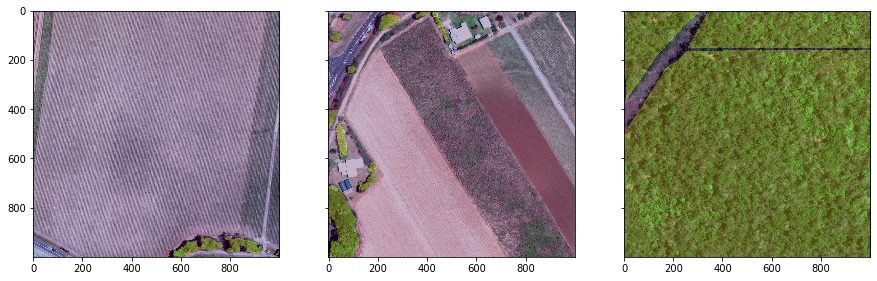

In [8]:
imshow_batch_of_three(next(iter(train_data)))